author: mobin habibpour 98201727

mobin.habibpour@gmail.com

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_train = [[.1,.1,1],
              [.5,.5,1],
              [.7,.3,1],
              [1.2,.7,1],
              [.2,1.2,1],
              [.5,1.4,1],
              [.9,1.2,1],
              [.8,1.8,1],
              [.2,.7,0],
              [.1,.9,0],
              [.4,.8,0],
              [.8,.9,0],
              [1.4,.4,0],
              [1.6,.1,0],
              [1.9,.5,0],
              [1.5,.8,0],
              [.2,1.6,0],
              [1.1,1.5,0],
              [1.5,1.2,0],
              [1.5,1.8,0],
              [1.8,1.4,0]]
data_train = np.asarray(data_train)
y_train = data_train[:,-1]
X_train = data_train[:,[0,1]]

data_test = [[.1,.3,1],
             [.4,.1,1],
             [.9,.4,1],
             [.8,1.3,1],
             [.1,1.6,1],
             [.6,1.9,1],
             [.1,.7,0],
             [.8,.9,0],
             [1.1,.7,0],
             [1.5,.2,0],
             [1.9,.8,0],
             [1.5,1.2,0],
             [1.2,1.8,0]]
data_test = np.asarray(data_test)
y_test = data_test[:,-1]
X_test = data_test[:,[0,1]]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualizing the decision tree

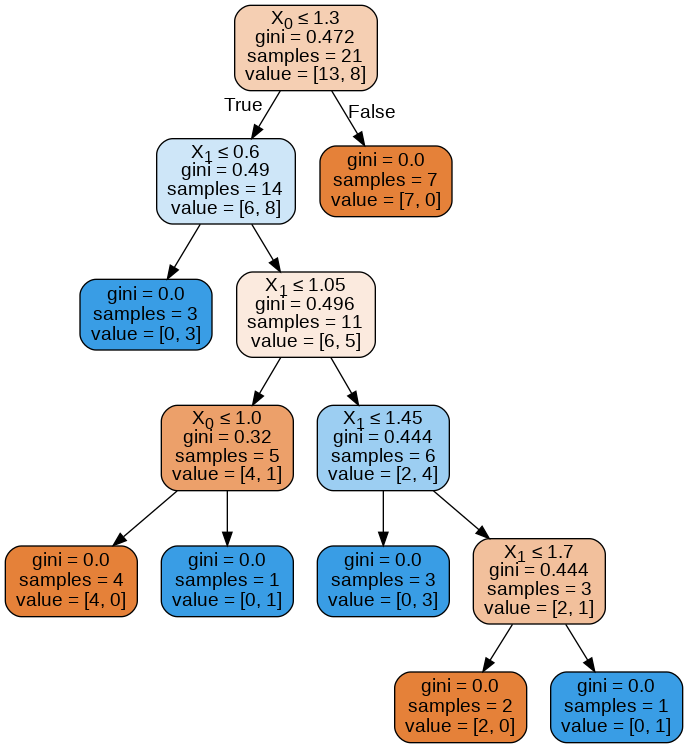

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


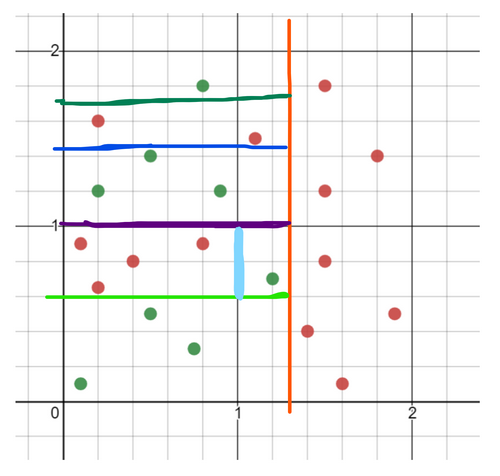

Text(0.5, 1.0, 'Accuracy Score: 0.7692307692307693')

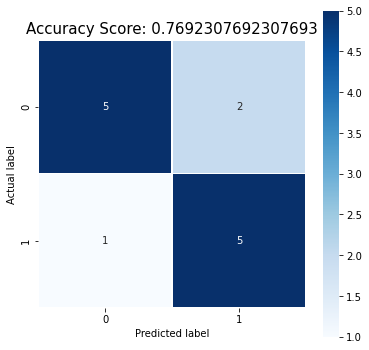

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Tree pruning, now instead of going all the way through the learning process, which leads to overfitting. we restrict the tree depth to stop the tree roots from getting too deep

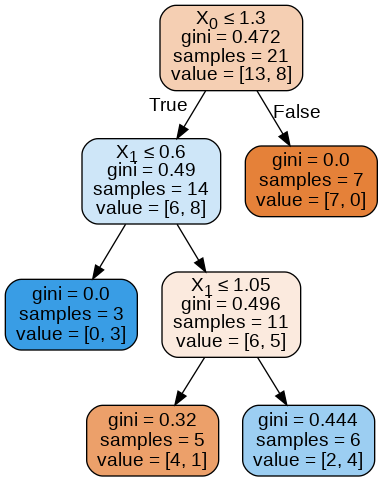

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



Text(0.5, 1.0, 'Accuracy Score: 0.9230769230769231')

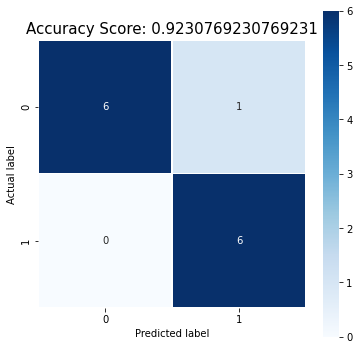

In [ ]:
y_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)